## Building Classifiers for Diabetes dataset using ML Model

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. All patients here are females of at least 21 years old of Pima Indian heritage.

**Independent variables**
	
1. Pregnancies : number of times pregnant
2. Glucose : plasma glucose concentration 
3. BloodPressure : Diastolic blood pressure (mm Hg)
4. SkinThickness : Triceps skin fold thickness (mm)
4. Insulin : 2-Hour serum insulin (mu U/ml)
5. BMI : Body mass index 
6. DiabetesPedigreeFunction : Diabetes pedigree function
7. Age : age in years

**Target variable**

Outcome : categorical variable (0 or 1) 


In [1]:
#Import the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Import the dataset.
df = pd.read_csv('health care diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Univariate analysis on Target variable.**

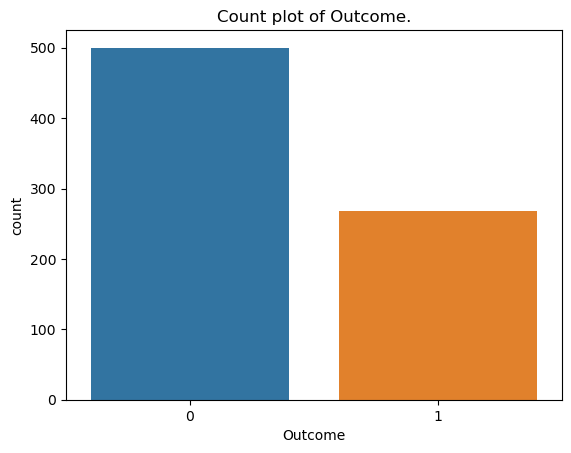



0    500
1    268
Name: Outcome, dtype: int64


In [5]:
#Count plot of Outcome (Target variable.)
sns.countplot(data = df, x = 'Outcome' )
plt.title("Count plot of Outcome.")
plt.show()
print("\n")
print(df['Outcome'].value_counts())

**Univariate analysis on the Independent Variables.**

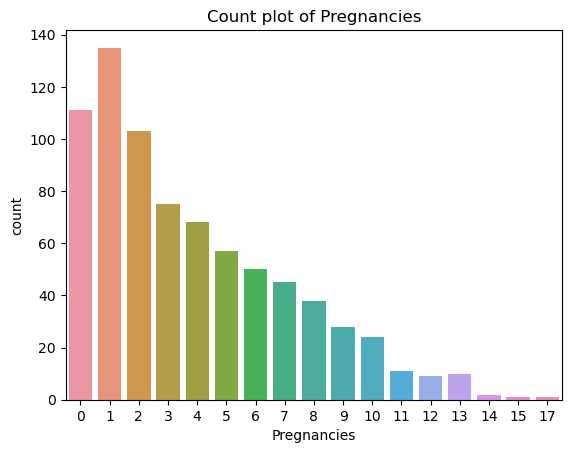

In [6]:
#Count plot of Pregnancies.
sns.countplot(data = df, x = 'Pregnancies')
plt.title("Count plot of Pregnancies")
plt.show()

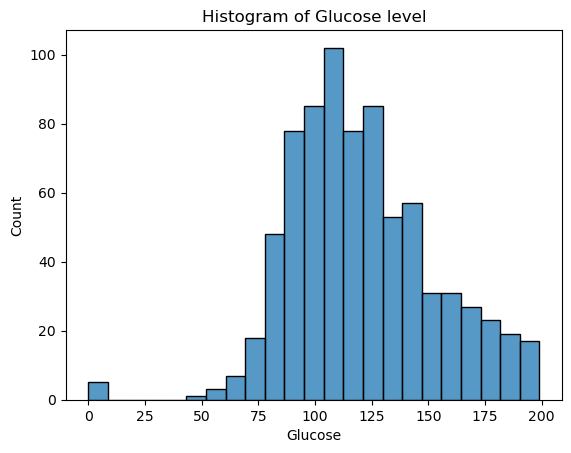

In [7]:
sns.histplot(data = df, x = 'Glucose')
plt.title("Histogram of Glucose level")
plt.show()

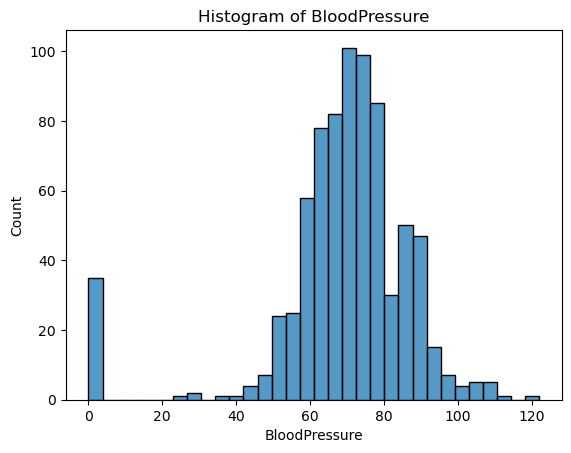

In [8]:
sns.histplot(data = df, x = 'BloodPressure')
plt.title("Histogram of BloodPressure")
plt.show()

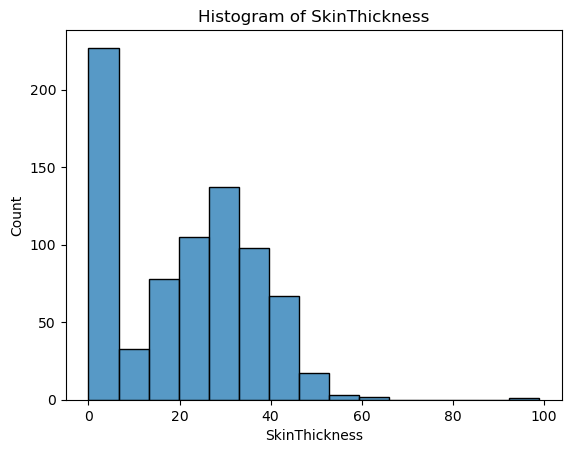

In [9]:
sns.histplot(data = df, x = 'SkinThickness')
plt.title("Histogram of SkinThickness")
plt.show()

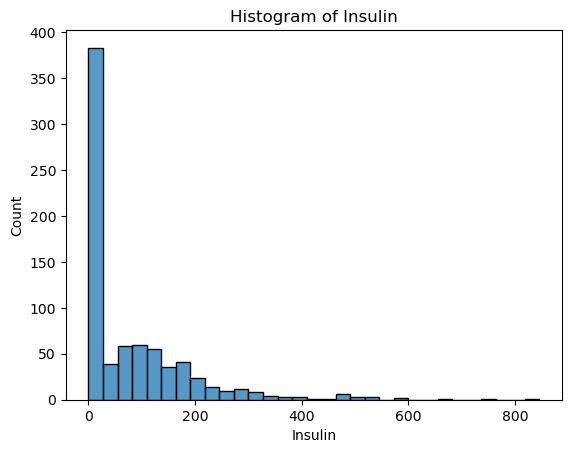

In [10]:
sns.histplot(data = df, x = 'Insulin')
plt.title("Histogram of Insulin")
plt.show()

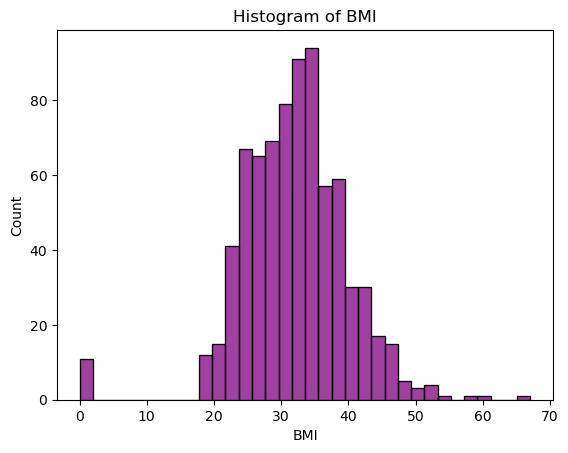

In [11]:
sns.histplot(data = df, x = 'BMI', color = 'purple')
plt.title("Histogram of BMI")
plt.show()

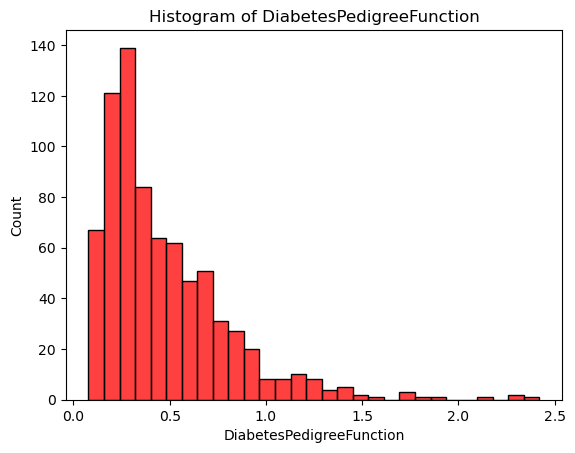

In [12]:
sns.histplot(data = df, x = 'DiabetesPedigreeFunction', color = 'red')
plt.title("Histogram of DiabetesPedigreeFunction")
plt.show()

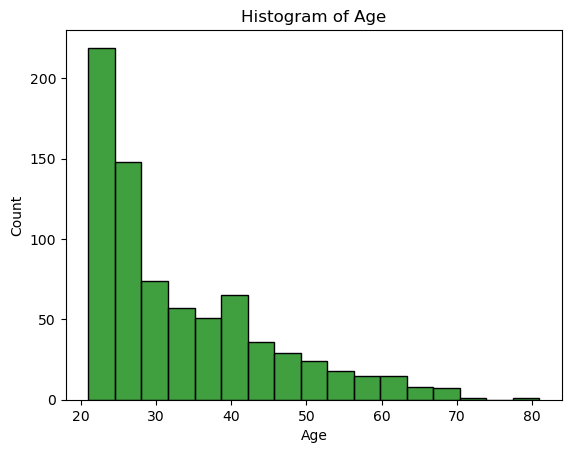

In [13]:
sns.histplot(data = df, x = 'Age', color = 'Green')
plt.title("Histogram of Age")
plt.show()

In [14]:
#Replace 0 in column Glucose, Blood Pressure, Insulin, Skin Thickness and BMI with null values.
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [15]:
#Check for the number of null values in the datset.
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
#Fill null values with median in column Glucose, Blood Pressure, Insulin, Skin Thickness and BMI with null values.
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [18]:
#Check for the number of null values in the datset.
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
#The data set after missing values treatment.
print(df.head())
print("\n")
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   7

**Check for the outliers in the datset.**

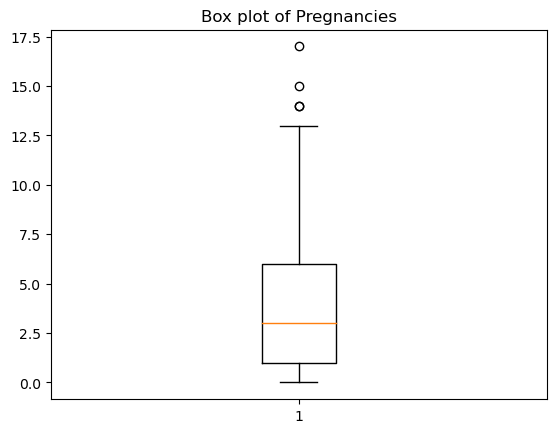

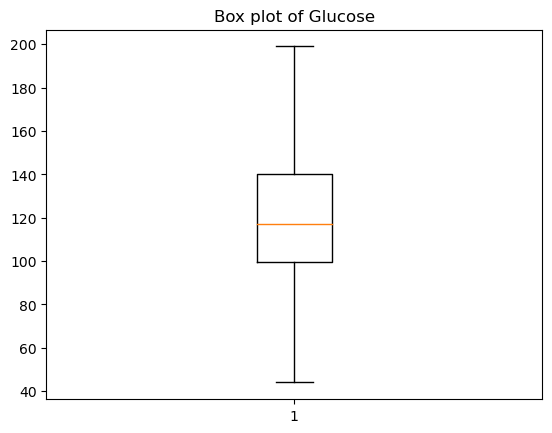

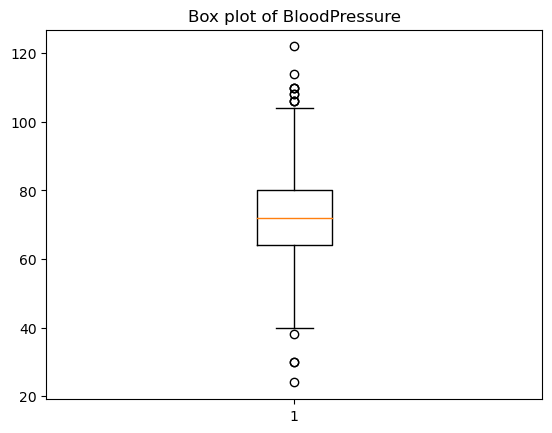

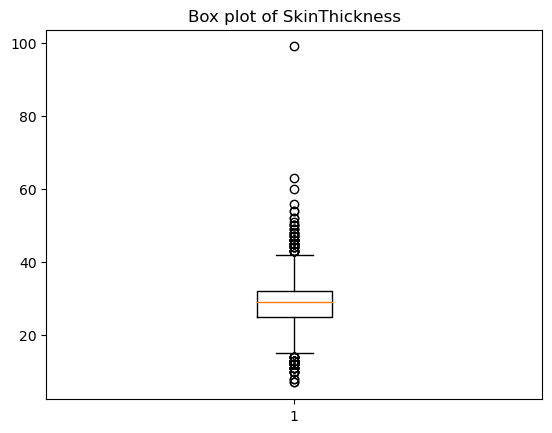

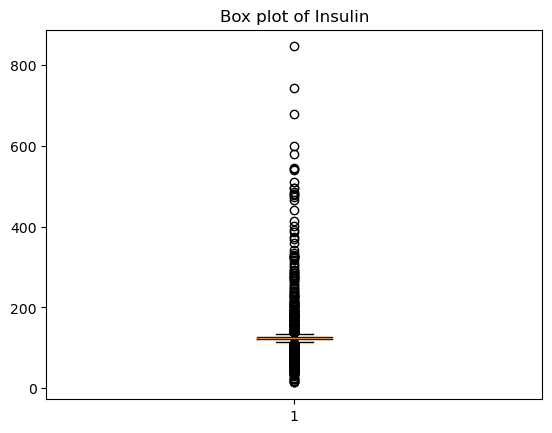

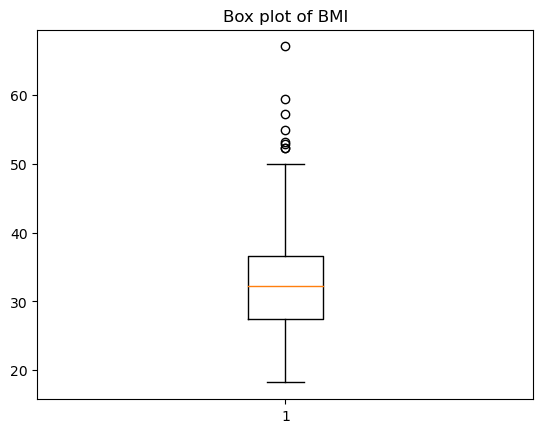

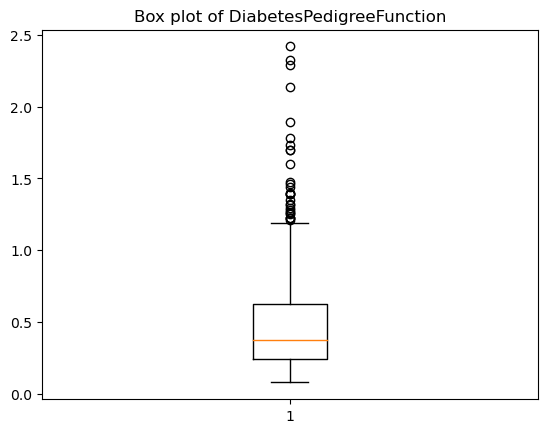

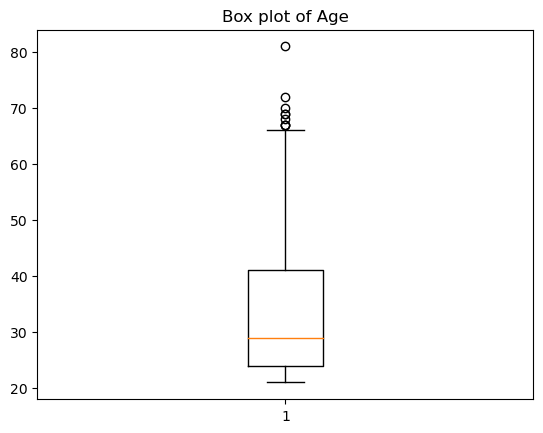

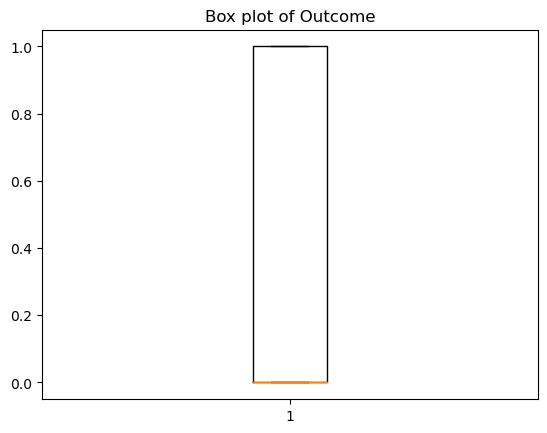

In [21]:
#Check for the outliers in the datset.
for col in df.columns:
    plt.boxplot(df[col])
    plt.title("Box plot of {}".format(col))
    plt.show()

**Bivariate Analysis of independent variables with Target variable.**

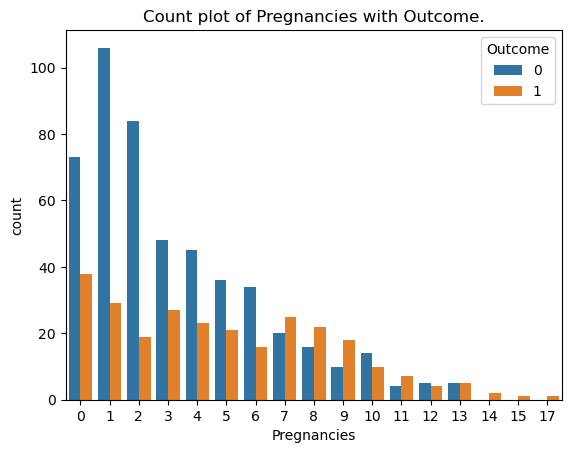

In [22]:
#Pregnancies variation with Outcome.
sns.countplot(data = df, x = 'Pregnancies', hue = 'Outcome')
plt.title("Count plot of Pregnancies with Outcome.")
plt.show()

#### Infrences from the above plot:
 1. A Person definetly have diabetes if no of pregnancies is greater than 6.
 2. Probablit of diabetes is less if no of preganancies person has/has is  1 or 2.
 3. Count of the pateient has pregnancies is more in range 1 - 5.
 4. Indpenedent variable pregnancies is impacting target variable Outcome.

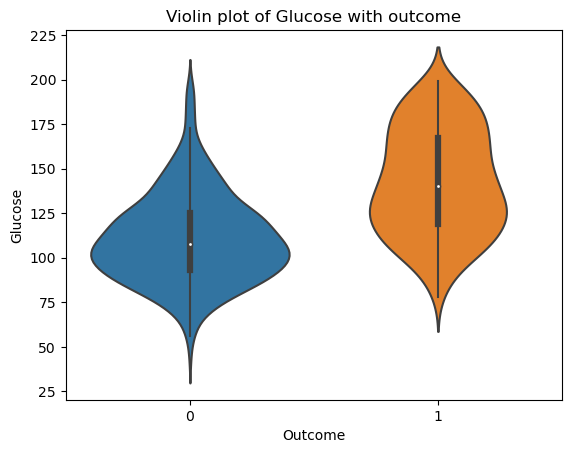

In [23]:
#Glucose variation with Outcome.
sns.violinplot(data = df, x = 'Outcome', y = 'Glucose')
plt.title("Violin plot of Glucose with outcome")
plt.show()

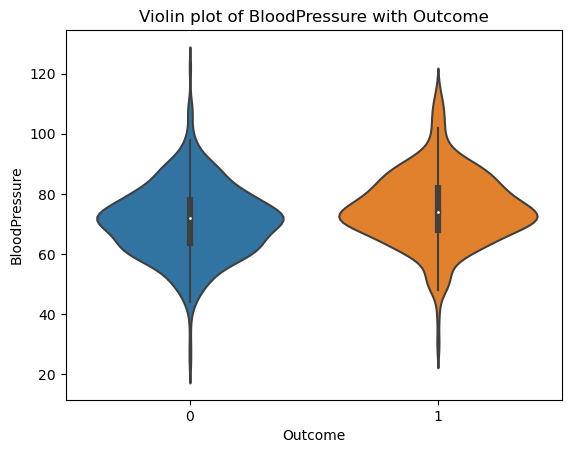

In [24]:
#BloodPressure variation with Outcome.
sns.violinplot(data = df, x = 'Outcome', y = 'BloodPressure')
plt.title("Violin plot of BloodPressure with Outcome")
plt.show()

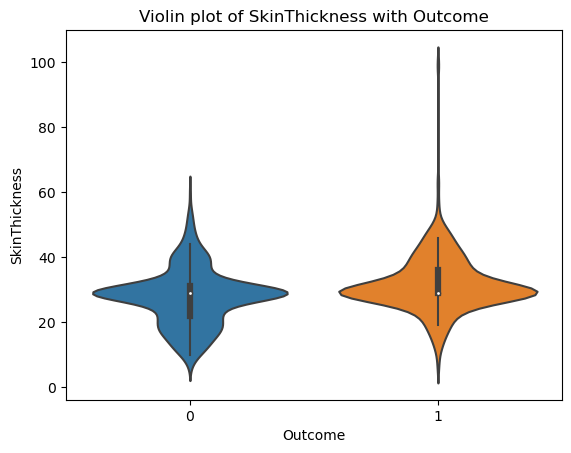

In [25]:
#SkinThickness variation with Outcome.
sns.violinplot(data = df, x = 'Outcome', y = 'SkinThickness')
plt.title("Violin plot of SkinThickness with Outcome")
plt.show()

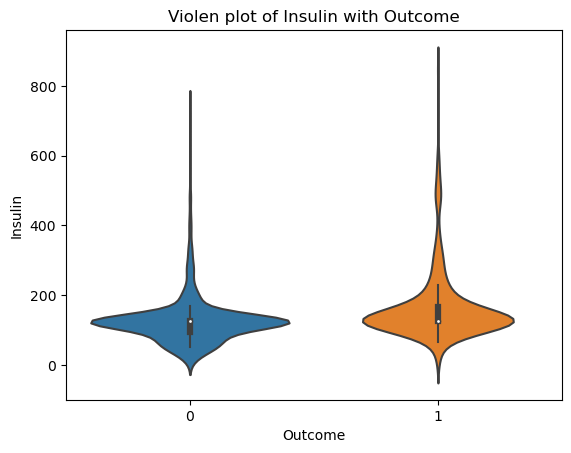

In [26]:
#Insulin variation with Outcome.
sns.violinplot(data = df, x = 'Outcome', y = 'Insulin')
plt.title("Violen plot of Insulin with Outcome")
plt.show()

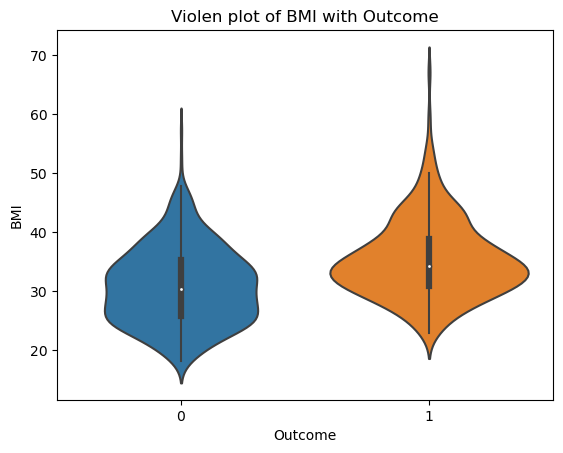

In [27]:
#BMI variation with Outcome.
sns.violinplot(data = df, x = 'Outcome', y = 'BMI')
plt.title("Violen plot of BMI with Outcome")
plt.show()

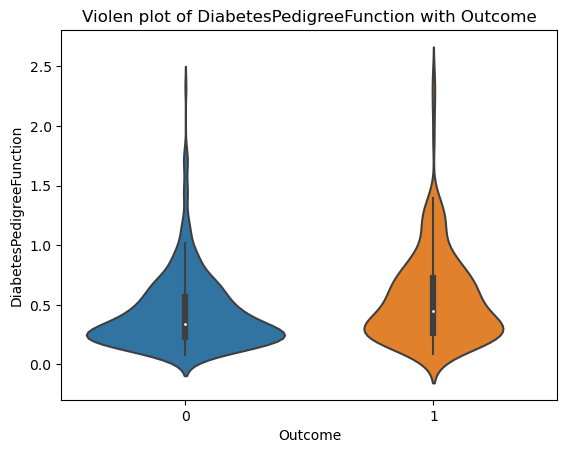

In [28]:
#DiabetesPedigreeFunction variation with Outcome.
sns.violinplot(data = df, x = 'Outcome', y = 'DiabetesPedigreeFunction')
plt.title("Violen plot of DiabetesPedigreeFunction with Outcome")
plt.show()

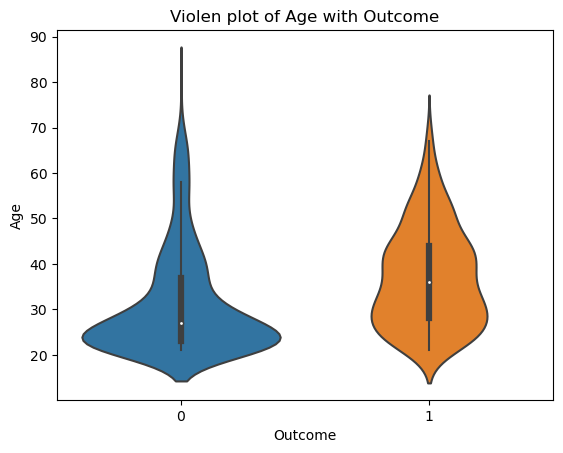

In [29]:
#Age variation with Outcome.
sns.violinplot(data = df, x = 'Outcome', y = 'Age')
plt.title("Violen plot of Age with Outcome")
plt.show()

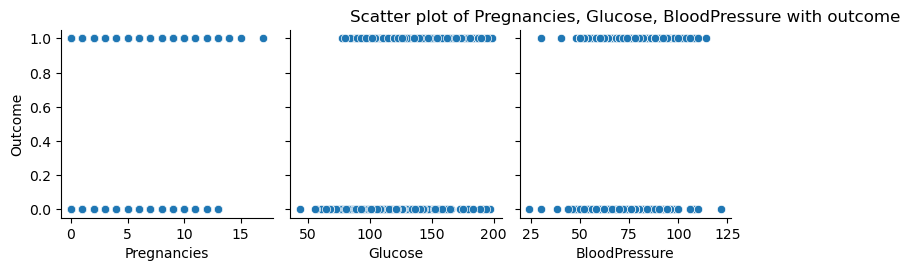

In [30]:
sns.pairplot(data = df, x_vars = ['Pregnancies', 'Glucose', 'BloodPressure'], y_vars = 'Outcome', kind = 'scatter')
plt.title("Scatter plot of Pregnancies, Glucose, BloodPressure with outcome")
plt.show()

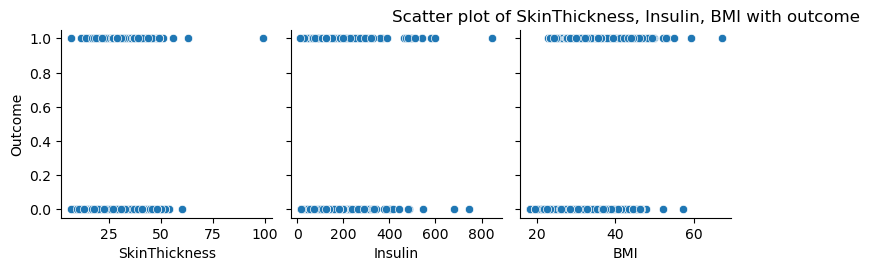

In [31]:
sns.pairplot(data = df, x_vars = ['SkinThickness', 'Insulin', 'BMI'], y_vars = 'Outcome', kind = 'scatter')
plt.title("Scatter plot of SkinThickness, Insulin, BMI with outcome")
plt.show()

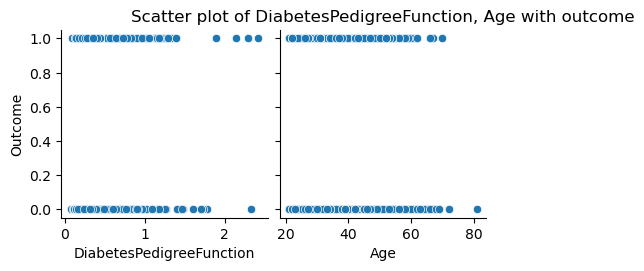

In [32]:
sns.pairplot(data = df, x_vars = ['DiabetesPedigreeFunction', 'Age'], y_vars = 'Outcome', kind = 'scatter')
plt.title("Scatter plot of DiabetesPedigreeFunction, Age with outcome")
plt.show()

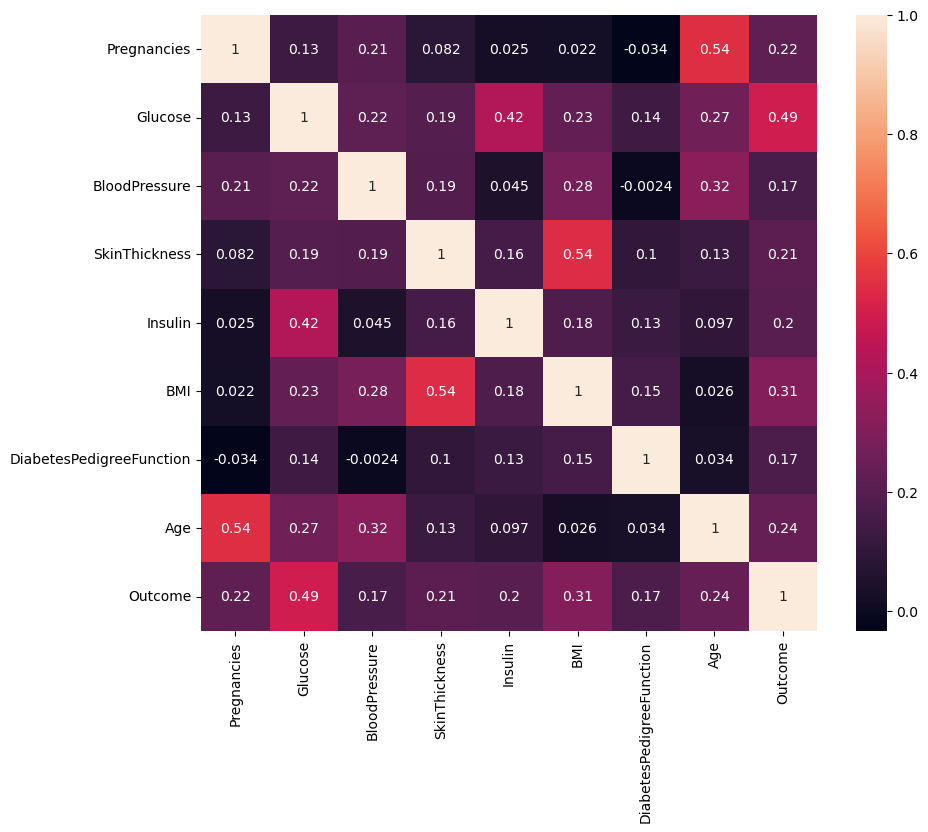

In [33]:
#Correlation Analysis using a heatmap.
plt.figure(figsize = (10,8))
sns.heatmap(data = df.corr(), annot = True, square = True)
plt.show()

#### Infrences:
1. Glucose level of the patient shows stong positive correlation(+0.49) with Outcome.
2. Age and Pregnancies shows strong positive correlation(+0.54).
3. Skin Thickness and BMI shows strong positive correlation(+0.54).
4. Insulin level and Gluscose shows a positive correlation(+0.42).
5. All variables are positively correlated with each other.

### Model building

**The Dateset contain labeled independent variables (or attributes) and dicotomus taget variables as:**

**Independent variables:**

 1. Pregnancies
 2. Glucose
 3. BloodPressure
 4. SkinThickness
 5. Insulin
 6. BMI
 7. DiabetesPedigreeFunction
 8. Age
 
**Target variable:**
   1. Outocme
    
Thus, the model will be supervised classification model.

In [38]:
#Split the dataset as inpendepent and dependent variables.
x = df.iloc[:,0:8]
y = df.iloc[:,-1]
print(x.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)
print(x.shape)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]
(768, 8)


In [40]:
#Split the datset in training and testing set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,train_size = 0.8, random_state = 6)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 10, shuffle = True)
from sklearn.model_selection import GridSearchCV

### 1. Logistic Regression Model

In [42]:
#Fitting the logistic Regression model.
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [44]:
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
         'penalty': ['None','l1','l2','elasticnet'],
         'C': [100,10,1,0.1,0.01],
         'max_iter': [100,1000,2500,5000]}
print(params)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['None', 'l1', 'l2', 'elasticnet'], 'C': [100, 10, 1, 0.1, 0.01], 'max_iter': [100, 1000, 2500, 5000]}


In [46]:
grid = GridSearchCV(model, param_grid = params, refit = True, verbose = 2, cv = kf)
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['None', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [47]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END ....C=100, max_iter=100, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=100, penalty=No

[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_

[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=10

[CV] END .C=100, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=100, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_ite

[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END 

[CV] END ......C=100, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=100, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=100, max_ite

[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=1

[CV] END C=10, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000

[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_ite

[CV] END ..C=10, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=10, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_i

[CV] END C=10, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, max_iter=

[CV] END ........C=10, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_ite

[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_it

[CV] END .C=1, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=1000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END .C=1, max_iter=1000

[CV] END .......C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=10

[CV] END ...C=1, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=1, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=1, max_it

[CV] END .C=1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .C=1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .C=1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .C=1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .C=1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .C=1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .C=1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .C=1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=

[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=50

[CV] END C=0.1, max_iter=100, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_it

[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total t

[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_ite

[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=0.1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_i

[CV] END C=0.1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=5000, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_it

[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=50

[CV] END .......C=0.01, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_i

[CV] END C=0.01, max_iter=1000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time=   0.0s
[CV] END ....C=0

[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=sag; total time=

[CV] END ....C=0.01, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=25

[CV] END ..C=0.01, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.01, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.01, max_iter=5000, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C

[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=5000, penalty=elasticnet, solver=saga; total time=   

/Users/mht/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2600 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mht/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mht/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/Users/mht/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['None', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [48]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.765520888418826


In [51]:
#Fitting the logistic Regression model on training Data.
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(C = 100, max_iter = 100, penalty = 'l1', solver = 'liblinear')
model.fit(x_train,y_train)
print(model.coef_)
print(model.intercept_)

[[ 0.34760091  1.12327109 -0.06541676  0.02630438 -0.15343719  0.71270898
   0.27506413  0.14745448]]
[-0.83551223]


In [54]:
#Predicting the result of the model.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)

In [55]:
accuracy_test = metrics.accuracy_score(predict_test, y_test)
accuracy_train = metrics.accuracy_score(predict_train, y_train)
print("Accuracy of the training data: {}.".format(accuracy_train))
print("Accuracy of the testing data: {}.".format(accuracy_test))

Accuracy of the training data: 0.7785016286644951.
Accuracy of the testing data: 0.7922077922077922.


In [56]:
matrix = metrics.confusion_matrix(y_test,predict_test)
print("Model confusion matrix : {}".format(matrix))
report = metrics.classification_report(y_test,predict_test)
print("Model Classification report")
print(report)

Model confusion matrix : [[90 13]
 [19 32]]
Model Classification report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.71      0.63      0.67        51

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



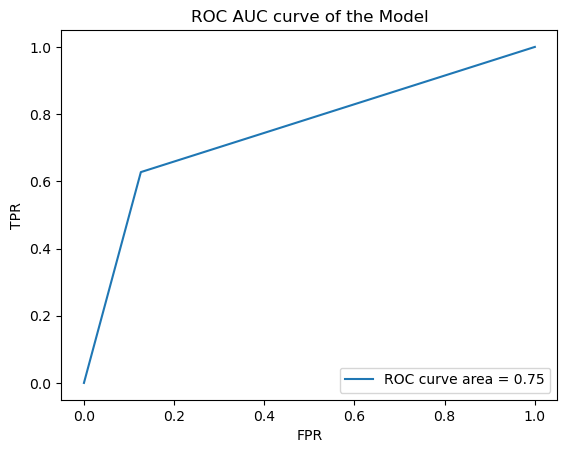

In [57]:
#AUC ROC Curve.
logistic_roc = metrics.roc_auc_score(y_test, predict_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, predict_test)
plt.figure()
plt.plot(fpr, tpr, label  = 'ROC curve area = %0.2f'% logistic_roc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve of the Model")
plt.legend(loc = "lower right")
plt.show()

In [59]:
#K-Fold Cross Validation way.
scores = cross_val_score(model, x, y, scoring = 'accuracy', cv = kf)
print("Cross validation score: {}".format(scores))
print("\n")
mean_accuracy = cross_val_score(model,x,y,scoring = 'accuracy',cv = kf).mean()
print("Mean Accuracy :{}.".format(mean_accuracy))
print("\n")
print("The number of CV score used in average: {}".format(len(scores)))

Cross validation score: [0.7012987  0.76623377 0.85714286 0.75324675 0.7012987  0.75324675
 0.79220779 0.85714286 0.75       0.78947368]


Mean Accuracy :0.7656869446343131.


The number of CV score used in average: 10


#### The accuracy for Logistic Regression Model is 76.56%.

### 2. Gradient Boost Algorithm

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [65]:
params = {'learning_rate': [0.1,0.01,0.001],'n_estimators' : [100,150,200],
         'max_depth': [3,4,5]}
params

{'learning_rate': [0.1, 0.01, 0.001],
 'n_estimators': [100, 150, 200],
 'max_depth': [3, 4, 5]}

In [66]:
grid = GridSearchCV(model, param_grid = params, refit = True, verbose = 2, cv = kf)
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [67]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=150; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.0

[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END .learning_rate=0.001, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END .learning_rate=0.00

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [68]:
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.7508989952406134


In [69]:
#Fitting the Gradient Boost model on training Data.
model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 200)
model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [70]:
#Predicting the result of the model.
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)

In [71]:
accuracy_test = metrics.accuracy_score(predict_test, y_test)
accuracy_train = metrics.accuracy_score(predict_train, y_train)
print("Accuracy of the training data: {}.".format(accuracy_train))
print("Accuracy of the testing data: {}.".format(accuracy_test))

Accuracy of the training data: 0.9804560260586319.
Accuracy of the testing data: 0.7922077922077922.


In [72]:
matrix = metrics.confusion_matrix(y_test,predict_test)
print("Model confusion matrix : {}".format(matrix))
report = metrics.classification_report(y_test,predict_test)
print("Model Classification report")
print(report)

Model confusion matrix : [[89 14]
 [18 33]]
Model Classification report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.70      0.65      0.67        51

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



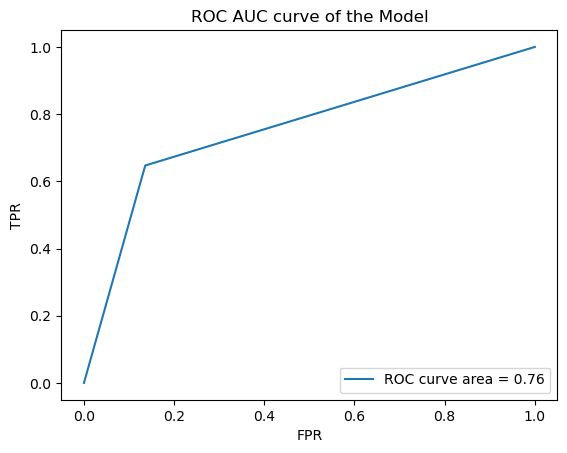

In [73]:
#AUC ROC Curve.
logistic_roc = metrics.roc_auc_score(y_test, predict_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, predict_test)
plt.figure()
plt.plot(fpr, tpr, label  = 'ROC curve area = %0.2f'% logistic_roc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve of the Model")
plt.legend(loc = "lower right")
plt.show()

In [74]:
#K-Fold Cross Validation way.
scores = cross_val_score(model, x, y, scoring = 'accuracy', cv = kf)
print("Cross validation score: {}".format(scores))
print("\n")
mean_accuracy = cross_val_score(model,x,y,scoring = 'accuracy',cv = kf).mean()
print("Mean Accuracy :{}.".format(mean_accuracy))
print("\n")
print("The number of CV score used in average: {}".format(len(scores)))

Cross validation score: [0.79220779 0.76623377 0.68831169 0.76623377 0.68831169 0.75324675
 0.79220779 0.74025974 0.72368421 0.77631579]


Mean Accuracy :0.7564764183185237.


The number of CV score used in average: 10


**The mean accuracy using gradient boost is 75.64%.**

### 3. Descision Tree Model

In [76]:
#Fitting Descision Tree Model.
from sklearn.tree import DecisionTreeClassifier               
model = DecisionTreeClassifier()

In [82]:
param = {'criterion' : ['gini', 'entropy','log_loss'], 'max_features' : ['sqrt','log2',None],
        'max_depth': [5,6,7,8,None]}
grid = GridSearchCV(model, param_grid = param, cv = kf, refit = True, verbose = 24)   

In [83]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV 1/10; 1/45] START criterion=gini, max_depth=5, max_features=sqrt............
[CV 1/10; 1/45] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.677 total time=   0.0s
[CV 2/10; 1/45] START criterion=gini, max_depth=5, max_features=sqrt............
[CV 2/10; 1/45] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.629 total time=   0.0s
[CV 3/10; 1/45] START criterion=gini, max_depth=5, max_features=sqrt............
[CV 3/10; 1/45] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.742 total time=   0.0s
[CV 4/10; 1/45] START criterion=gini, max_depth=5, max_features=sqrt............
[CV 4/10; 1/45] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.710 total time=   0.0s
[CV 5/10; 1/45] START criterion=gini, max_depth=5, max_features=sqrt............
[CV 5/10; 1/45] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.721 total time=   0.0s
[CV 6/10; 1/45] START criterion=

[CV 6/10; 7/45] END criterion=gini, max_depth=7, max_features=sqrt;, score=0.672 total time=   0.0s
[CV 7/10; 7/45] START criterion=gini, max_depth=7, max_features=sqrt............
[CV 7/10; 7/45] END criterion=gini, max_depth=7, max_features=sqrt;, score=0.721 total time=   0.0s
[CV 8/10; 7/45] START criterion=gini, max_depth=7, max_features=sqrt............
[CV 8/10; 7/45] END criterion=gini, max_depth=7, max_features=sqrt;, score=0.770 total time=   0.0s
[CV 9/10; 7/45] START criterion=gini, max_depth=7, max_features=sqrt............
[CV 9/10; 7/45] END criterion=gini, max_depth=7, max_features=sqrt;, score=0.689 total time=   0.0s
[CV 10/10; 7/45] START criterion=gini, max_depth=7, max_features=sqrt...........
[CV 10/10; 7/45] END criterion=gini, max_depth=7, max_features=sqrt;, score=0.787 total time=   0.0s
[CV 1/10; 8/45] START criterion=gini, max_depth=7, max_features=log2............
[CV 1/10; 8/45] END criterion=gini, max_depth=7, max_features=log2;, score=0.645 total time=  

[CV 6/10; 13/45] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.656 total time=   0.0s
[CV 7/10; 13/45] START criterion=gini, max_depth=None, max_features=sqrt........
[CV 7/10; 13/45] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.689 total time=   0.0s
[CV 8/10; 13/45] START criterion=gini, max_depth=None, max_features=sqrt........
[CV 8/10; 13/45] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.738 total time=   0.0s
[CV 9/10; 13/45] START criterion=gini, max_depth=None, max_features=sqrt........
[CV 9/10; 13/45] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.672 total time=   0.0s
[CV 10/10; 13/45] START criterion=gini, max_depth=None, max_features=sqrt.......
[CV 10/10; 13/45] END criterion=gini, max_depth=None, max_features=sqrt;, score=0.689 total time=   0.0s
[CV 1/10; 14/45] START criterion=gini, max_depth=None, max_features=log2........
[CV 1/10; 14/45] END criterion=gini, max_depth=None, max_features=log2;, s

[CV 4/10; 19/45] END criterion=entropy, max_depth=6, max_features=sqrt;, score=0.629 total time=   0.0s
[CV 5/10; 19/45] START criterion=entropy, max_depth=6, max_features=sqrt........
[CV 5/10; 19/45] END criterion=entropy, max_depth=6, max_features=sqrt;, score=0.820 total time=   0.0s
[CV 6/10; 19/45] START criterion=entropy, max_depth=6, max_features=sqrt........
[CV 6/10; 19/45] END criterion=entropy, max_depth=6, max_features=sqrt;, score=0.705 total time=   0.0s
[CV 7/10; 19/45] START criterion=entropy, max_depth=6, max_features=sqrt........
[CV 7/10; 19/45] END criterion=entropy, max_depth=6, max_features=sqrt;, score=0.869 total time=   0.0s
[CV 8/10; 19/45] START criterion=entropy, max_depth=6, max_features=sqrt........
[CV 8/10; 19/45] END criterion=entropy, max_depth=6, max_features=sqrt;, score=0.721 total time=   0.0s
[CV 9/10; 19/45] START criterion=entropy, max_depth=6, max_features=sqrt........
[CV 9/10; 19/45] END criterion=entropy, max_depth=6, max_features=sqrt;, sc

[CV 1/10; 25/45] END criterion=entropy, max_depth=8, max_features=sqrt;, score=0.661 total time=   0.0s
[CV 2/10; 25/45] START criterion=entropy, max_depth=8, max_features=sqrt........
[CV 2/10; 25/45] END criterion=entropy, max_depth=8, max_features=sqrt;, score=0.645 total time=   0.0s
[CV 3/10; 25/45] START criterion=entropy, max_depth=8, max_features=sqrt........
[CV 3/10; 25/45] END criterion=entropy, max_depth=8, max_features=sqrt;, score=0.548 total time=   0.0s
[CV 4/10; 25/45] START criterion=entropy, max_depth=8, max_features=sqrt........
[CV 4/10; 25/45] END criterion=entropy, max_depth=8, max_features=sqrt;, score=0.661 total time=   0.0s
[CV 5/10; 25/45] START criterion=entropy, max_depth=8, max_features=sqrt........
[CV 5/10; 25/45] END criterion=entropy, max_depth=8, max_features=sqrt;, score=0.787 total time=   0.0s
[CV 6/10; 25/45] START criterion=entropy, max_depth=8, max_features=sqrt........
[CV 6/10; 25/45] END criterion=entropy, max_depth=8, max_features=sqrt;, sc

[CV 2/10; 30/45] END criterion=entropy, max_depth=None, max_features=None;, score=0.677 total time=   0.0s
[CV 3/10; 30/45] START criterion=entropy, max_depth=None, max_features=None.....
[CV 3/10; 30/45] END criterion=entropy, max_depth=None, max_features=None;, score=0.677 total time=   0.0s
[CV 4/10; 30/45] START criterion=entropy, max_depth=None, max_features=None.....
[CV 4/10; 30/45] END criterion=entropy, max_depth=None, max_features=None;, score=0.645 total time=   0.0s
[CV 5/10; 30/45] START criterion=entropy, max_depth=None, max_features=None.....
[CV 5/10; 30/45] END criterion=entropy, max_depth=None, max_features=None;, score=0.672 total time=   0.0s
[CV 6/10; 30/45] START criterion=entropy, max_depth=None, max_features=None.....
[CV 6/10; 30/45] END criterion=entropy, max_depth=None, max_features=None;, score=0.656 total time=   0.0s
[CV 7/10; 30/45] START criterion=entropy, max_depth=None, max_features=None.....
[CV 7/10; 30/45] END criterion=entropy, max_depth=None, max_

[CV 9/10; 35/45] END criterion=log_loss, max_depth=6, max_features=log2;, score=0.689 total time=   0.0s
[CV 10/10; 35/45] START criterion=log_loss, max_depth=6, max_features=log2......
[CV 10/10; 35/45] END criterion=log_loss, max_depth=6, max_features=log2;, score=0.738 total time=   0.0s
[CV 1/10; 36/45] START criterion=log_loss, max_depth=6, max_features=None.......
[CV 1/10; 36/45] END criterion=log_loss, max_depth=6, max_features=None;, score=0.694 total time=   0.0s
[CV 2/10; 36/45] START criterion=log_loss, max_depth=6, max_features=None.......
[CV 2/10; 36/45] END criterion=log_loss, max_depth=6, max_features=None;, score=0.726 total time=   0.0s
[CV 3/10; 36/45] START criterion=log_loss, max_depth=6, max_features=None.......
[CV 3/10; 36/45] END criterion=log_loss, max_depth=6, max_features=None;, score=0.806 total time=   0.0s
[CV 4/10; 36/45] START criterion=log_loss, max_depth=6, max_features=None.......
[CV 4/10; 36/45] END criterion=log_loss, max_depth=6, max_features=No

[CV 7/10; 41/45] END criterion=log_loss, max_depth=8, max_features=log2;, score=0.689 total time=   0.0s
[CV 8/10; 41/45] START criterion=log_loss, max_depth=8, max_features=log2.......
[CV 8/10; 41/45] END criterion=log_loss, max_depth=8, max_features=log2;, score=0.754 total time=   0.0s
[CV 9/10; 41/45] START criterion=log_loss, max_depth=8, max_features=log2.......
[CV 9/10; 41/45] END criterion=log_loss, max_depth=8, max_features=log2;, score=0.689 total time=   0.0s
[CV 10/10; 41/45] START criterion=log_loss, max_depth=8, max_features=log2......
[CV 10/10; 41/45] END criterion=log_loss, max_depth=8, max_features=log2;, score=0.738 total time=   0.0s
[CV 1/10; 42/45] START criterion=log_loss, max_depth=8, max_features=None.......
[CV 1/10; 42/45] END criterion=log_loss, max_depth=8, max_features=None;, score=0.645 total time=   0.0s
[CV 2/10; 42/45] START criterion=log_loss, max_depth=8, max_features=None.......
[CV 2/10; 42/45] END criterion=log_loss, max_depth=8, max_features=No

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, None],
                         'max_features': ['sqrt', 'log2', None]},
             verbose=24)

In [84]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}
0.7411686938127975


In [85]:
#Fitting the Decision Tree model on training Data.
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, max_features = 'sqrt')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt')

In [86]:
#Predicting the result of the model.
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)

In [87]:
accuracy_test = metrics.accuracy_score(predict_test, y_test)
accuracy_train = metrics.accuracy_score(predict_train, y_train)
print("Accuracy of the training data: {}.".format(accuracy_train))
print("Accuracy of the testing data: {}.".format(accuracy_test))

Accuracy of the training data: 0.8208469055374593.
Accuracy of the testing data: 0.7532467532467533.


In [88]:
matrix = metrics.confusion_matrix(y_test,predict_test)
print("Model confusion matrix : {}".format(matrix))
report = metrics.classification_report(y_test,predict_test)
print("Model Classification report")
print(report)

Model confusion matrix : [[82 21]
 [17 34]]
Model Classification report
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       103
           1       0.62      0.67      0.64        51

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.76      0.75      0.76       154



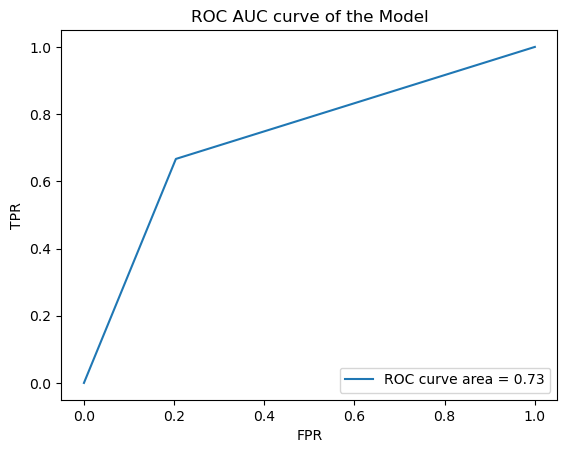

In [89]:
#ROC - AUC way.
roc_tree = metrics.roc_auc_score(y_test,predict_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,predict_test)
plt.plot(fpr, tpr, label = "ROC curve area = %0.2f"% roc_tree)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve of the Model")
plt.legend(loc = 'lower right')
plt.show()

In [91]:
#K-Fold way.
CV_score = cross_val_score(model, x, y, cv = kf)
print("Cross validation score: {}".format(CV_score))
print("\n")
CV_accuracy = cross_val_score(model, x, y, cv = kf).mean()
print("Mean CV accuracy: {}".format(CV_accuracy))
print("\n")
print("The number of CV score used in average: {}".format(len(CV_score)))

Cross validation score: [0.72727273 0.76623377 0.75324675 0.7012987  0.79220779 0.75324675
 0.64935065 0.7012987  0.51315789 0.67105263]


Mean CV accuracy: 0.7201298701298702


The number of CV score used in average: 10


**The mean accuracy using decision Tree model is 72%.**

#### 3. Random Forest Model

In [76]:
#Fitting the Random forest Model.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
#Predict the outcome.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)
accuracy_test = metrics.accuracy_score(y_test,predict_test)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print("Training data accuracy: {}".format(accuracy_train))
print("Testing data accuracy: {}".format(accuracy_test))

Training data accuracy: 1.0
Testing data accuracy: 0.7272727272727273


In [78]:
#Generate the calssifaction report and confusion matrix.
matrix = metrics.confusion_matrix(y_test,predict_test)
print("Confusion matrix of the model: ")
print(matrix)
print("\n")
print("Classification report of the model: ")
report = metrics.classification_report(y_test,predict_test)
print(report)

Confusion matrix of the model: 
[[83 15]
 [27 29]]


Classification report of the model: 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        98
           1       0.66      0.52      0.58        56

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



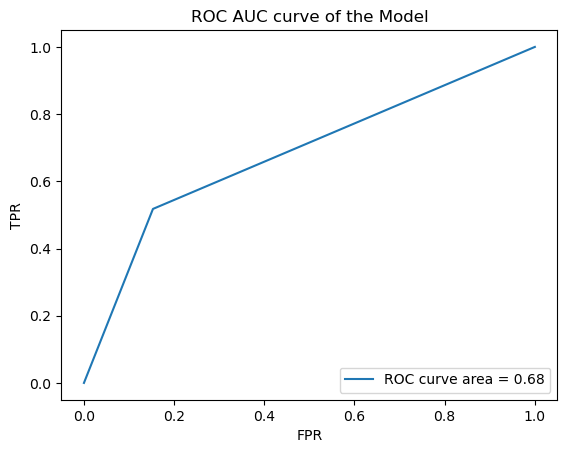

In [79]:
#ROC - AUC way.
roc_tree = metrics.roc_auc_score(y_test,predict_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,predict_test)
plt.plot(fpr, tpr, label = "ROC curve area = %0.2f"% roc_tree)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve of the Model")
plt.legend(loc = 'lower right')
plt.show()

In [80]:
#K-Fold way.
CV_score = cross_val_score(model, x, y, cv = kf)
print("Cross validation score: {}".format(CV_score))
print("\n")
CV_accuracy = cross_val_score(model, x, y, cv = kf).mean()
print("Mean CV accuracy: {}".format(CV_accuracy))
print("\n")
print("The number of CV score used in average: {}".format(len(CV_score)))

Cross validation score: [0.79220779 0.76623377 0.72727273 0.74025974 0.76623377 0.76623377
 0.76623377 0.72727273 0.82894737 0.77631579]


Mean CV accuracy: 0.7539644565960355


The number of CV score used in average: 10


In [98]:
param = {'n_estimators': [50,100],'criterion' : ['gini', 'entropy','logloss'], 'max_features' : ['sqrt','log2'],
        'max_depth': [3,4,5,6,7,8,'None']}
grid = GridSearchCV(model, cv = 5, param_grid = param, n_jobs = -1, verbose = 2, refit = True,
                   scoring = 'accuracy', error_score = 'raise')

In [99]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


InvalidParameterError: The 'max_depth' parameter of RandomForestClassifier must be an int in the range [1, inf) or None. Got 'None' instead.

In [ ]:
grid

In [ ]:
#Fitting the Random forest Model.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

#### 4. Naive Bayes Model

In [ ]:
#Fitting Naive baye's Model.
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

In [ ]:
#Predict the outcome.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)
accuracy_test = metrics.accuracy_score(y_test,predict_test)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print("Training data accuracy: {}".format(accuracy_train))
print("Testing data accuracy: {}".format(accuracy_test))

In [ ]:
#Generate the calssifaction report and confusion matrix.
matrix = metrics.confusion_matrix(y_test,predict_test)
print("Confusion matrix of the model: ")
print(matrix)
print("\n")
print("Classification report of the model: ")
report = metrics.classification_report(y_test,predict_test)
print(report)

In [ ]:
#ROC - AUC way.
roc_tree = metrics.roc_auc_score(y_test,predict_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,predict_test)
plt.plot(fpr, tpr, label = "ROC curve area = %0.2f"% roc_tree)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve of the Model")
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#K-Fold way.
CV_score = cross_val_score(model, x_scaled, y, cv = kf)
print("Cross validation score: {}".format(CV_score))
print("\n")
CV_accuracy = cross_val_score(model, x_scaled, y, cv = kf).mean()
print("Mean CV accuracy: {}".format(CV_accuracy))
print("\n")
print("The number of CV score used in average: {}".format(len(CV_score)))

### 5. KNN Model

In [ ]:
#Fitting KNN Model.
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 27)
model.fit(x_train,y_train)

In [ ]:
#Predict the outcome.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)
accuracy_test = metrics.accuracy_score(y_test,predict_test)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print("Training data accuracy: {}".format(accuracy_train))
print("Testing data accuracy: {}".format(accuracy_test))

In [ ]:
#Generate the calssifaction report and confusion matrix.
matrix = metrics.confusion_matrix(y_test,predict_test)
print("Confusion matrix of the model: ")
print(matrix)
print("\n")
print("Classification report of the model: ")
report = metrics.classification_report(y_test,predict_test)
print(report)

In [ ]:
#ROC - AUC way.
roc_tree = metrics.roc_auc_score(y_test,predict_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,predict_test)
plt.plot(fpr, tpr, label = "ROC curve area = %0.2f"% roc_tree)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve of the Model")
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#K-Fold way.
CV_score = cross_val_score(model, x_scaled, y, cv = kf)
print("Cross validation score: {}".format(CV_score))
print("\n")
CV_accuracy = cross_val_score(model, x_scaled, y, cv = kf).mean()
print("Mean CV accuracy: {}".format(CV_accuracy))
print("\n")
print("The number of CV score used in average: {}".format(len(CV_score)))

### 6. SVM Model

In [ ]:
#Fitting the SVM Model.
from sklearn.svm import SVC
model = SVC(kernel = 'sigmoid')
model.fit(x_train,y_train)

In [ ]:
#Predict the outcome.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)
accuracy_test = metrics.accuracy_score(y_test,predict_test)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print("Training data accuracy: {}".format(accuracy_train))
print("Testing data accuracy: {}".format(accuracy_test))

In [ ]:
#Generate the calssifaction report and confusion matrix.
matrix = metrics.confusion_matrix(y_test,predict_test)
print("Confusion matrix of the model: ")
print(matrix)
print("\n")
print("Classification report of the model: ")
report = metrics.classification_report(y_test,predict_test)
print(report)

In [ ]:
#ROC - AUC way.
roc = metrics.roc_auc_score(y_test,predict_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,predict_test)
plt.plot(fpr, tpr, label = "ROC curve area = %0.2f"% roc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve of the Model")
plt.legend(loc = 'lower right')
plt.show()

#### Hyperparameter tuning for SVM Model.

In [46]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'kernel': ['liner', 'rbf', 'sigmoid', 'poly'],'C':[0.1,1,10,100],'gamma': [10, 1, 0.1, 0.01, 0.001] }
param_grid

In [ ]:
grid = GridSearchCV(model, param_grid, cv = kf, verbose = 2, refit = True)
grid

In [ ]:
grid.fit(x_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
#Fitting the SVM Linear Model with best params.
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1, gamma = 10)
model.fit(x_train,y_train)

In [ ]:
#Predict the outcome.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)
accuracy_test = metrics.accuracy_score(y_test,predict_test)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print("Training data accuracy: {}".format(accuracy_train))
print("Testing data accuracy: {}".format(accuracy_test))

In [ ]:
#Fitting the SVM Radial Model with best params.
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', C = 10, gamma = 0.001)
model.fit(x_train,y_train)

In [ ]:
#Predict the outcome.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)
accuracy_test = metrics.accuracy_score(y_test,predict_test)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print("Training data accuracy: {}".format(accuracy_train))
print("Testing data accuracy: {}".format(accuracy_test))

In [ ]:
#Fitting the SVM Sigmoid Model with best params.
from sklearn.svm import SVC
model = SVC(kernel = 'sigmoid', C = 1, gamma = 0.01)
model.fit(x_train,y_train)

In [ ]:
#Predict the outcome.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)
accuracy_test = metrics.accuracy_score(y_test,predict_test)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print("Training data accuracy: {}".format(accuracy_train))
print("Testing data accuracy: {}".format(accuracy_test))

In [ ]:
#K-Fold way.
CV_score = cross_val_score(model, x_scaled, y, cv = kf)
print("Cross validation score: {}".format(CV_score))
print("\n")
CV_accuracy = cross_val_score(model, x_scaled, y, cv = kf).mean()
print("Mean CV accuracy: {}".format(CV_accuracy))
print("\n")
print("The number of CV score used in average: {}".format(len(CV_score)))

### 7. AdaBoost Classifier Model

In [108]:
#Fitting the Adboost Model.
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train,y_train)

AdaBoostClassifier()

In [110]:
param = {'n_estimators':[30,50,70,100],'learning_rate': [0.1,0.001,0.001],
        'algorithm':['SAMME.R','SAMME']}
grid = GridSearchCV(model, param_grid = param, cv = kf, refit = True, verbose = 24, n_jobs = -1)

In [111]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.1, 0.001, 0.001],
                         'n_estimators': [30, 50, 70, 100]},
             verbose=24)

In [112]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=100)

In [113]:
#Fitting the Adboost Model.
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=100)
model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=100)

In [114]:
#Predict the outcome.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)
accuracy_test = metrics.accuracy_score(y_test,predict_test)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print("Training data accuracy: {}".format(accuracy_train))
print("Testing data accuracy: {}".format(accuracy_test))

Training data accuracy: 0.7915309446254072
Testing data accuracy: 0.7012987012987013


In [115]:
#Generate the calssifaction report and confusion matrix.
matrix = metrics.confusion_matrix(y_test,predict_test)
print("Confusion matrix of the model: ")
print(matrix)
print("\n")
print("Classification report of the model: ")
report = metrics.classification_report(y_test,predict_test)
print(report)

Confusion matrix of the model: 
[[87 11]
 [35 21]]


Classification report of the model: 
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        98
           1       0.66      0.38      0.48        56

    accuracy                           0.70       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



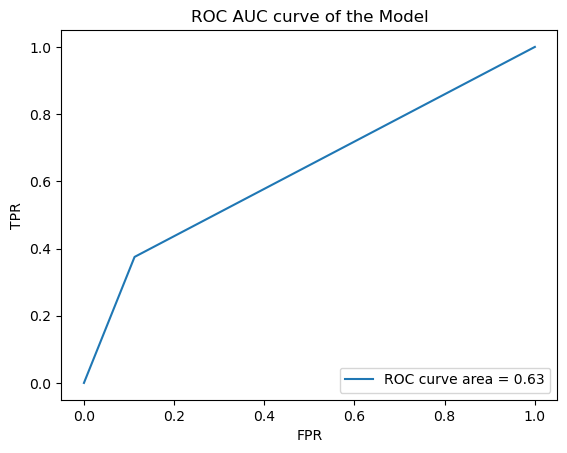

In [116]:
#ROC - AUC way.
roc = metrics.roc_auc_score(y_test,predict_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,predict_test)
plt.plot(fpr, tpr, label = "ROC curve area = %0.2f"% roc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve of the Model")
plt.legend(loc = 'lower right')
plt.show()

In [118]:
#K-Fold way.
CV_score = cross_val_score(model, x_train, y_train, cv = kf)
print("Cross validation score: {}".format(CV_score))
print("\n")
CV_accuracy = cross_val_score(model, x_scaled, y, cv = kf).mean()
print("Mean CV accuracy: {}".format(CV_accuracy))
print("\n")
print("The number of CV score used in average: {}".format(len(CV_score)))

Cross validation score: [0.74193548 0.74193548 0.62903226 0.80645161 0.85245902 0.81967213
 0.68852459 0.75409836 0.85245902 0.70491803]


Mean CV accuracy: 0.7539302802460697


The number of CV score used in average: 10
[CV 4/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30.....
[CV 4/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.790 total time=   0.1s
[CV 5/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30.....
[CV 5/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.721 total time=   0.1s
[CV 1/10; 2/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=50.....
[CV 1/10; 2/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.726 total time=   0.2s
[CV 6/10; 2/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=50.....
[CV 6/10; 2/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.869 total time=   0.2s
[CV 9/10; 2/24] START algor

[CV 3/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30.....
[CV 3/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.726 total time=   0.1s
[CV 8/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30.....
[CV 8/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.738 total time=   0.1s
[CV 2/10; 2/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=50.....
[CV 2/10; 2/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.758 total time=   0.2s
[CV 5/10; 2/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=50.....
[CV 5/10; 2/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.738 total time=   0.2s
[CV 10/10; 2/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=50....
[CV 10/10; 2/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.820 total time=   0.2s
[CV 4/10; 3/24] START algorithm=SAMME.R, learning_rate=0.1,

[CV 1/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30.....
[CV 1/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.710 total time=   0.1s
[CV 6/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30.....
[CV 6/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.869 total time=   0.1s
[CV 10/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30....
[CV 10/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.852 total time=   0.1s
[CV 4/10; 2/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=50.....
[CV 4/10; 2/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.758 total time=   0.2s
[CV 7/10; 2/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=50.....
[CV 7/10; 2/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.754 total time=   0.2s
[CV 2/10; 3/24] START algorithm=SAMME.R, learning_rate=0.1,

[CV 2/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30.....
[CV 2/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.758 total time=   0.1s
[CV 7/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30.....
[CV 7/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.721 total time=   0.1s
[CV 9/10; 1/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=30.....
[CV 9/10; 1/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=30;, score=0.787 total time=   0.1s
[CV 3/10; 2/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=50.....
[CV 3/10; 2/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.710 total time=   0.2s
[CV 8/10; 2/24] START algorithm=SAMME.R, learning_rate=0.1, n_estimators=50.....
[CV 8/10; 2/24] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.770 total time=   0.2s
[CV 1/10; 3/24] START algorithm=SAMME.R, learning_rate=0.1, 

#### 8. XGBoost Classifier Model

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)

In [ ]:
#Predict the outcome.
from sklearn import metrics
predict_test = model.predict(x_test)
predict_train = model.predict(x_train)
accuracy_test = metrics.accuracy_score(y_test,predict_test)
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print("Training data accuracy: {}".format(accuracy_train))
print("Testing data accuracy: {}".format(accuracy_test))

In [ ]:
#Generate the calssifaction report and confusion matrix.
matrix = metrics.confusion_matrix(y_test,predict_test)
print("Confusion matrix of the model: ")
print(matrix)
print("\n")
print("Classification report of the model: ")
report = metrics.classification_report(y_test,predict_test)
print(report)

In [ ]:
#ROC - AUC way.
roc = metrics.roc_auc_score(y_test,predict_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,predict_test)
plt.plot(fpr, tpr, label = "ROC curve area = %0.2f"% roc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve of the Model")
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#K-Fold way.
CV_score = cross_val_score(model, x_scaled, y, cv = kf)
print("Cross validation score: {}".format(CV_score))
print("\n")
CV_accuracy = cross_val_score(model, x_scaled, y, cv = kf).mean()
print("Mean CV accuracy: {}".format(CV_accuracy))
print("\n")
print("The number of CV score used in average: {}".format(len(CV_score)))

### Gradient Boost Model

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
params = {'learning_rate': [0.1,0.01,0.001],'n_estimators' : [100,150,200],
         'max_depth': [3,4,5]}

In [62]:
params = {'learning_rate': [0.1,0.01,0.001],'n_estimators' : [100,150,200],
         'max_depth': [3,4,5]}